In [148]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Its alive!")

Its alive!


In [149]:
#Functions
def bin_groups(df, percent=.05):
    for col in df:
        if not pd.api.types.is_numeric_dtype(df[col]):
            for group, count in df[col].value_counts().iteritems():
                if count / len(df) < percent:
                    df.loc[df[col] == group, col] = 'Other'
    return df

In [150]:
drop_list = []
df = pd.read_csv("./Utah_Crash_Data_2020.csv")
df = df.drop([
"CRASH_ID",
"CRASH_DATETIME",
# "CRASH_SEVERITY_ID",
"ROUTE",
"MILEPOINT",
"LAT_UTM_Y",
"LONG_UTM_X",
# "MAIN_ROAD_NAME",  
# "CITY",                              
# "COUNTY_NAME",                       
"WORK_ZONE_RELATED",                 
"PEDESTRIAN_INVOLVED",               
"BICYCLIST_INVOLVED",                
"MOTORCYCLE_INVOLVED",               
"IMPROPER_RESTRAINT",                
"UNRESTRAINED",                      
"DUI",                               
"INTERSECTION_RELATED",              
"WILD_ANIMAL_RELATED",               
"DOMESTIC_ANIMAL_RELATED",           
"OVERTURN_ROLLOVER",                 
"COMMERCIAL_MOTOR_VEH_INVOLVED",     
"TEENAGE_DRIVER_INVOLVED",           
"OLDER_DRIVER_INVOLVED",             
"NIGHT_DARK_CONDITION",              
"SINGLE_VEHICLE",                    
"DISTRACTED_DRIVING",                
"DROWSY_DRIVING",                   
"ROADWAY_DEPARTURE"
], axis=1)

df = df.dropna()

C:\Users\whyri\AppData\Local\Temp\ipykernel_8204\459188639.py:2: DtypeWarning: Columns (0,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Utah_Crash_Data_2020.csv")


In [151]:
df["SEVERITY"] = df["CRASH_SEVERITY_ID"] >= 3
df = df.drop("CRASH_SEVERITY_ID",axis=1)
df.head()

,MAIN_ROAD_NAME,CITY,COUNTY_NAME,SEVERITY
0,900 WEST,SALT LAKE CITY,SALT LAKE,False
1,1215 E HIGHLAND DR,DRAPER,SALT LAKE,False
2,1022 E DRAPER PKY,DRAPER,SALT LAKE,False
3,13463 S FORT ST,DRAPER,SALT LAKE,True
4,13043 S 1300 E,DRAPER,SALT LAKE,False


In [153]:
# df["CRASH_MONTH"] = pd.to_datetime(df["CRASH_DATETIME"]).dt.month
# df["CRASH_WEEKDAY"] = pd.to_datetime(df["CRASH_DATETIME"]).dt.day_name()
# df["CRASH_HOUR"] = pd.to_datetime(df["CRASH_DATETIME"]).dt.hour

# df = df.drop(columns=["CRASH_DATETIME"])
df = bin_groups(df)
for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]) and col != 'SEVERITY':
        df = pd.get_dummies(df, columns=[col])

df.head()

KeyboardInterrupt: 

In [ ]:
y = df['SEVERITY'] # Label
X = df.drop(columns=['SEVERITY']) # Features
X.head()

,COUNTY_NAME_BEAVER,COUNTY_NAME_BOX ELDER,COUNTY_NAME_CACHE,COUNTY_NAME_CARBON,COUNTY_NAME_DAGGETT,COUNTY_NAME_DAVIS,COUNTY_NAME_DUCHESNE,COUNTY_NAME_EMERY,COUNTY_NAME_GARFIELD,COUNTY_NAME_GRAND,...,NIGHT_DARK_CONDITION_False,NIGHT_DARK_CONDITION_True,SINGLE_VEHICLE_False,SINGLE_VEHICLE_True,DISTRACTED_DRIVING_False,DISTRACTED_DRIVING_True,DROWSY_DRIVING_False,DROWSY_DRIVING_True,ROADWAY_DEPARTURE_False,ROADWAY_DEPARTURE_True
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [ ]:
 # Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345) # 70% training and 30% test
        

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [ ]:
# Predict the labels for test dataset
y_pred = clf.predict(X_test)

# View the predicted versus actual in a DataFrame
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df.head(10)

,Actual,Predicted
142406,False,False
81569,False,False
68028,False,False
145834,False,False
217784,True,False
49703,True,False
70908,False,False
2014,False,False
20939,False,False
105277,False,False


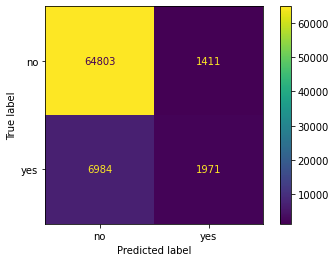

In [ ]:
# Import scikit-learn metrics module. See complete list of Classification metrics here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn import metrics

from matplotlib import pyplot as plt
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['no', 'yes'])
cm_display.plot(values_format='d')
plt.show()

In [ ]:
clf.score(X_test, y_test)

0.8883183227128204

In [ ]:
# Several of these metrics have to work off of dummy codes rather than categorical values. Therefore:
y_test_dummies = pd.get_dummies(y_test)
y_pred_dummies = pd.get_dummies(y_pred)
    
# Accuracy  = (true positives + true negatives) / (total cases); ranges from 0 (worst) to 1 (best)
print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")
    
# # Precision = (true positives / (true positives + false positives))
# print(f"Precision:\t{metrics.precision_score(y_test_dummies.yes, y_pred_dummies.yes, labels=['no', 'yes'])}")
     
# # Recall    = (true positives / (true positives + false negatives)) 
# print(f"Recall:\t\t{metrics.recall_score(y_test_dummies.yes, y_pred_dummies.yes, labels=['no', 'yes'])}")
    
# # F1        = (2 * (precision * recall) / (precision + recall))
# print(f"F1:\t\t{metrics.f1_score(y_test_dummies.yes, y_pred_dummies.yes, labels=['no', 'yes'])}")

Accuracy:	0.8883183227128204
